In [368]:
%matplotlib inline

In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread, imshow
from skimage.transform import resize
import cv2 # OpenCV
from PIL import Image

from scipy.ndimage import convolve
from collections import Counter
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

In [370]:
tiger_image = imread("data/tiger.jpg")

In [371]:
tiger_image.shape

(600, 580, 3)

In [372]:
tiger_image.dtype

dtype('uint8')

In [373]:
tiger_image[20, 100]

array([235, 235, 233], dtype=uint8)

In [374]:
r, g, b = tiger_image[:, :, 0], tiger_image[:, :, 1], tiger_image[:, :, 2]

In [375]:
r.shape

(600, 580)

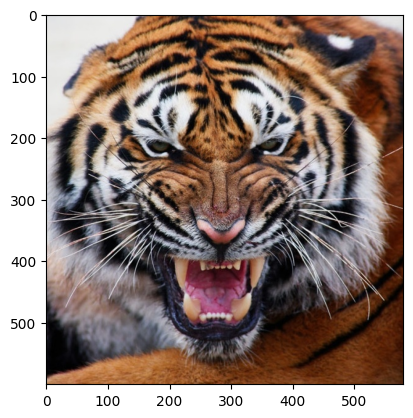

In [376]:
plt.imshow(tiger_image)
plt.show()

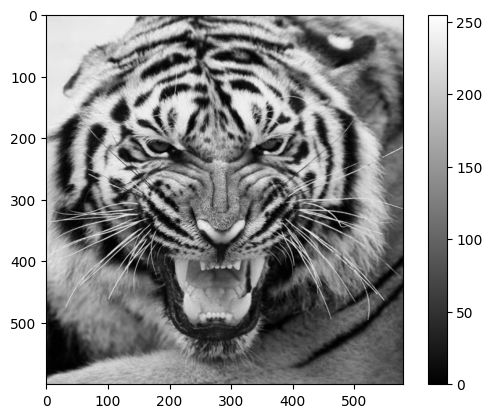

In [377]:
plt.imshow(r, cmap='gray')
plt.colorbar()
plt.show()

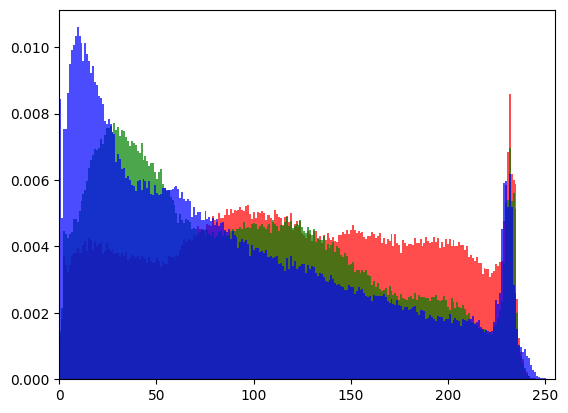

In [378]:
plt.hist(r.ravel(), bins=256, color="r", alpha=0.7, density=True)
plt.hist(g.ravel(), bins=256, color="g", alpha=0.7, density=True)
plt.hist(b.ravel(), bins=256, color="b", alpha=0.7, density=True)

plt.xlim(0, 255)
plt.xlabels="Counts"
plt.ylabel='Num pixels'

plt.show()

In [379]:
tiger_grayscale = 0.299 * r + 0.587 * g + 0.114 * b

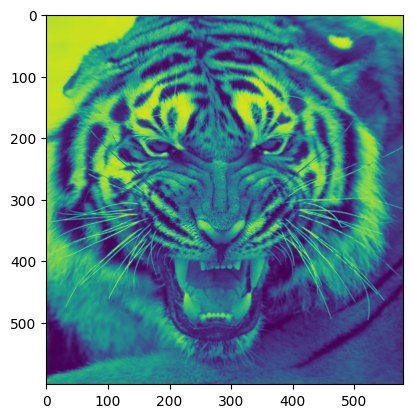

In [380]:
plt.imshow(tiger_grayscale)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

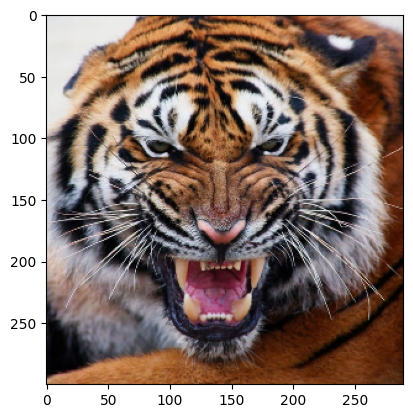

In [381]:
plt.imshow(tiger_image[::2, ::2, :], cmap="gray")
plt.show

In [382]:
np.product(tiger_image[::2, ::2, :].shape)

261000

In [383]:
np.product(tiger_image.shape)

1044000

In [384]:
tiger_sample = tiger_grayscale[100:110, 100:110].astype(int)

In [385]:
tiger_sample

array([[159, 155, 152, 144, 126, 108, 106, 105, 118, 112],
       [157, 144, 135, 132, 119, 103,  91,  82,  90,  92],
       [155, 136, 124, 122, 110, 104,  90,  76,  77,  80],
       [149, 132, 117, 107, 111, 114, 103,  88,  82,  73],
       [138, 120, 104, 103, 114, 119, 119, 103,  83,  67],
       [133, 116, 104, 107, 113, 115, 110,  92,  73,  61],
       [131, 118, 108, 111, 111, 104,  90,  78,  72,  65],
       [120, 105,  95,  94,  98, 101,  93,  77,  68,  61],
       [110, 102,  98,  95,  94, 104,  99,  80,  62,  56],
       [101, 100, 100,  97,  96,  93,  86,  72,  59,  58]])

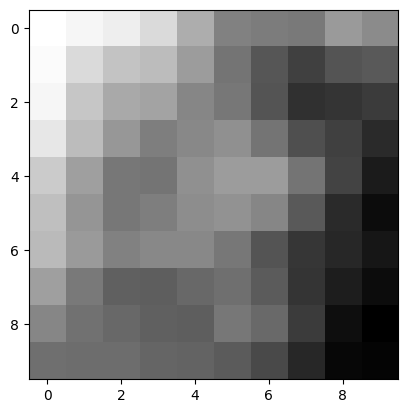

In [386]:
plt.imshow(tiger_sample, cmap="gray")
plt.show()

In [387]:
copy_filter = ([
    [0, 1, 0],
    [0, -1, 0],
    [0, 1, 0]
])

In [388]:
result = convolve(tiger_sample, copy_filter)

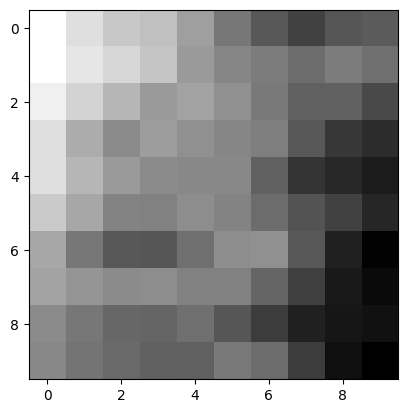

In [389]:
plt.imshow(result, cmap="gray")
plt.show()

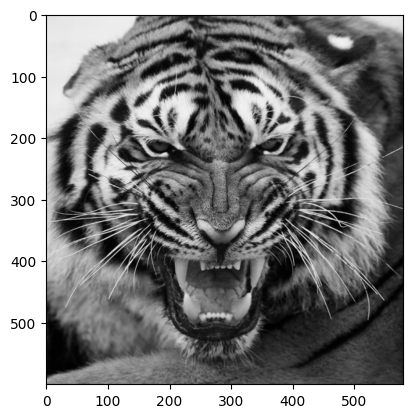

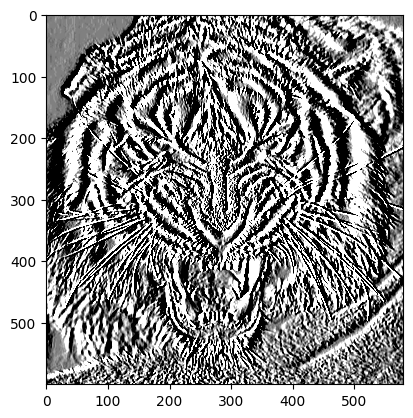

In [390]:
# conv_filter = np.ones([11, 11]) / 121
conv_filter = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])
plt.imshow(tiger_grayscale, cmap="gray")
plt.show()
result = convolve(tiger_grayscale, conv_filter)
plt.imshow(result, cmap="gray", vmin = -20, vmax = 20)
plt.show()

In [391]:
result.min()

-816.836

In [392]:
result.max()

794.712

In [393]:
treshholded = tiger_grayscale.copy()


In [394]:
treshholded[treshholded < 100] = 0
treshholded[treshholded >= 100] = 255

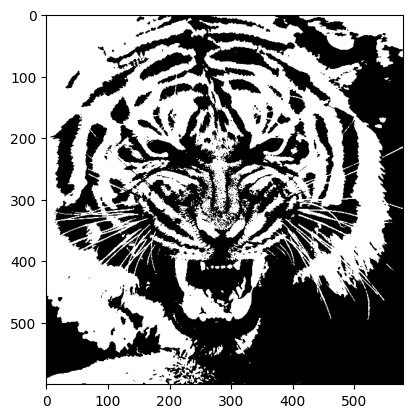

In [395]:
plt.imshow(treshholded, cmap = "gray")
plt.show()

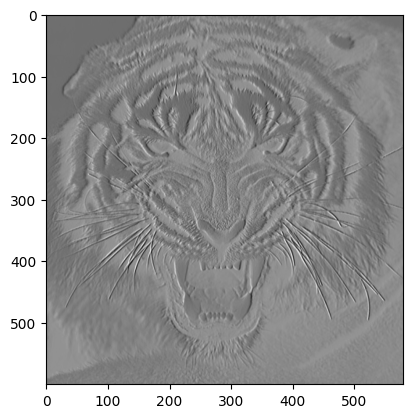

In [396]:
plt.imshow(result - tiger_grayscale, cmap = "gray")
plt.show()

In [397]:
tiger_z = (tiger_grayscale - tiger_grayscale.mean()) / tiger_grayscale.std(ddof = 1)

In [398]:
tiger_z.mean(), tiger_z.std(ddof = 1)

(1.9013143549994406e-16, 1.0)

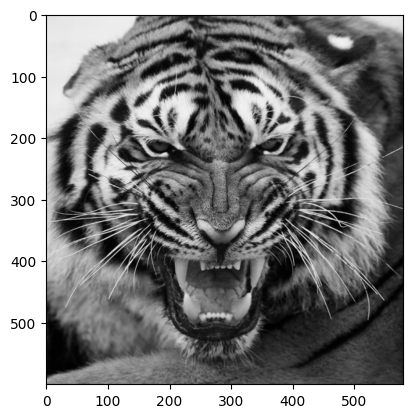

In [399]:
plt.imshow(tiger_z, cmap = "gray")
plt.show()

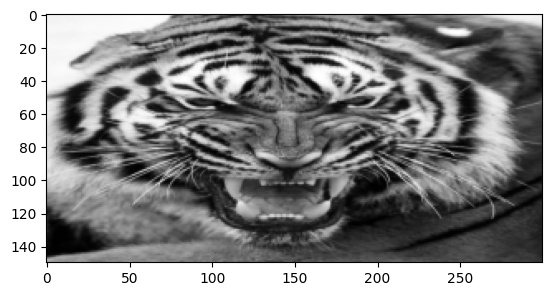

In [400]:
plt.imshow(resize(tiger_grayscale, (150, 300)), cmap="gray")
plt.show()

In [401]:
with open("data/alice.txt", "r") as f:
    text = f.read()

In [402]:
print(text)




Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Release Date: June 25, 2008 [EBook #11]
Last Updated: October 6, 2016

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***



Produced by Arthur DiBianca and David Widger

















ALICE’S ADVENTURES
IN WONDERLAND


By Lewis Carroll



THE MILLENNIUM FULCRUM EDITION 3.0





Contents
CHAPTER I. 	Down the Rabbit-Hole
CHAPTER II. 	The Pool of Tears
CHAPTER III. 	A Caucus-Race and a Long Tale
CHAPTER IV. 	The Rabbit Sends in a Little Bill
CHAPTER V. 	Advice from a Caterpillar
CHAPTER VI. 	Pig and Pepper
CHAPTER VII. 	A Mad 

In [403]:
character_counter = Counter(text)

In [404]:
characters = character_counter.most_common(20)

In [405]:
[ch[1] for ch in characters]

[29580,
 15243,
 11754,
 9348,
 9172,
 7926,
 7881,
 7669,
 7054,
 6481,
 5275,
 5111,
 3926,
 2843,
 2766,
 2725,
 2566,
 2489,
 2272,
 2266]

<BarContainer object of 20 artists>

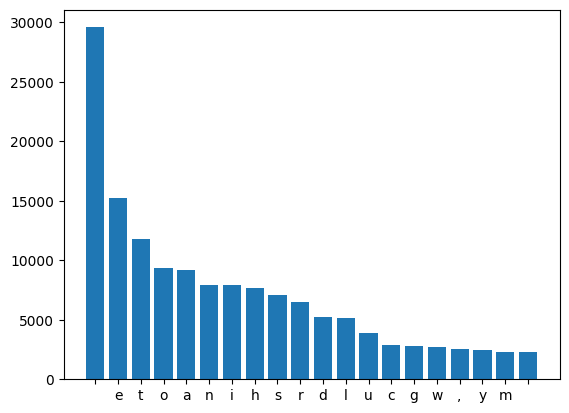

In [406]:
plt.bar([ch[0] for ch in characters], [ch[1] for ch in characters])

In [407]:
words = re.split("\W+", text)

In [408]:
words = [w.lower() for w in words]

In [409]:
stop = set(stopwords.words("english"))


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/ivelin.borisov/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.9/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.9/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.9/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
words = [w for w in words if not in stop]

In [ ]:
word_counter = Counter(words)

In [ ]:
word_counter.most_common(2000)

[('the', 1825),
 ('and', 944),
 ('to', 809),
 ('a', 695),
 ('of', 632),
 ('it', 610),
 ('she', 553),
 ('i', 546),
 ('you', 481),
 ('said', 462),
 ('in', 432),
 ('alice', 404),
 ('was', 358),
 ('that', 330),
 ('as', 274),
 ('her', 248),
 ('with', 228),
 ('at', 227),
 ('s', 222),
 ('t', 218),
 ('on', 204),
 ('all', 200),
 ('this', 181),
 ('for', 179),
 ('had', 178),
 ('but', 175),
 ('be', 167),
 ('not', 166),
 ('or', 155),
 ('they', 155),
 ('so', 152),
 ('very', 145),
 ('what', 142),
 ('is', 135),
 ('little', 129),
 ('he', 128),
 ('out', 118),
 ('if', 116),
 ('one', 106),
 ('down', 103),
 ('up', 103),
 ('about', 102),
 ('there', 101),
 ('no', 100),
 ('do', 98),
 ('his', 96),
 ('then', 94),
 ('gutenberg', 93),
 ('them', 88),
 ('know', 88),
 ('project', 87),
 ('have', 85),
 ('like', 85),
 ('were', 85),
 ('would', 83),
 ('went', 83),
 ('again', 83),
 ('herself', 83),
 ('by', 81),
 ('when', 80),
 ('could', 78),
 ('queen', 76),
 ('any', 76),
 ('thought', 74),
 ('off', 73),
 ('are', 73),
 ('ca

In [ ]:
stemmer = PorterStemmer()
words_for_stemming = ["careless", "flies", "dies", "seizing", "itemization", "sensational", "traditional", "reference", "plot"]
print([stemmer.stem(word) for word in words_for_stemming])

['careless', 'fli', 'die', 'seiz', 'item', 'sensat', 'tradit', 'refer', 'plot']


In [ ]:
[stemmer.stem(word) for word in words]

['',
 'project',
 'gutenberg',
 's',
 'alic',
 's',
 'adventur',
 'in',
 'wonderland',
 'by',
 'lewi',
 'carrol',
 'thi',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyon',
 'anywher',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrict',
 'whatsoev',
 'you',
 'may',
 'copi',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'term',
 'of',
 'the',
 'project',
 'gutenberg',
 'licens',
 'includ',
 'with',
 'thi',
 'ebook',
 'or',
 'onlin',
 'at',
 'www',
 'gutenberg',
 'org',
 'titl',
 'alic',
 's',
 'adventur',
 'in',
 'wonderland',
 'author',
 'lewi',
 'carrol',
 'releas',
 'date',
 'june',
 '25',
 '2008',
 'ebook',
 '11',
 'last',
 'updat',
 'octob',
 '6',
 '2016',
 'languag',
 'english',
 'charact',
 'set',
 'encod',
 'utf',
 '8',
 'start',
 'of',
 'thi',
 'project',
 'gutenberg',
 'ebook',
 'alic',
 's',
 'adventur',
 'in',
 'wonderland',
 'produc',
 'by',
 'arthur',
 'dibianca',
 'and',
 'david',
 'widger',
 'alic',
 's',
 'adve

In [ ]:
word_counter = Counter(words)

In [ ]:
word_counter.most_common(2000)

[('the', 1825),
 ('and', 944),
 ('to', 809),
 ('a', 695),
 ('of', 632),
 ('it', 610),
 ('she', 553),
 ('i', 546),
 ('you', 481),
 ('said', 462),
 ('in', 432),
 ('alice', 404),
 ('was', 358),
 ('that', 330),
 ('as', 274),
 ('her', 248),
 ('with', 228),
 ('at', 227),
 ('s', 222),
 ('t', 218),
 ('on', 204),
 ('all', 200),
 ('this', 181),
 ('for', 179),
 ('had', 178),
 ('but', 175),
 ('be', 167),
 ('not', 166),
 ('or', 155),
 ('they', 155),
 ('so', 152),
 ('very', 145),
 ('what', 142),
 ('is', 135),
 ('little', 129),
 ('he', 128),
 ('out', 118),
 ('if', 116),
 ('one', 106),
 ('down', 103),
 ('up', 103),
 ('about', 102),
 ('there', 101),
 ('no', 100),
 ('do', 98),
 ('his', 96),
 ('then', 94),
 ('gutenberg', 93),
 ('them', 88),
 ('know', 88),
 ('project', 87),
 ('have', 85),
 ('like', 85),
 ('were', 85),
 ('would', 83),
 ('went', 83),
 ('again', 83),
 ('herself', 83),
 ('by', 81),
 ('when', 80),
 ('could', 78),
 ('queen', 76),
 ('any', 76),
 ('thought', 74),
 ('off', 73),
 ('are', 73),
 ('ca

In [ ]:
corpus = fetch_20newsgroups()["data"]

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)>

In [ ]:
count_vectorizer = CountVectorizer()

In [ ]:
count_vectorizer.fit(corpus)

In [ ]:
count_vectorizer.stop_words_

AttributeError: 'CountVectorizer' object has no attribute 'stop_words_'

In [ ]:
count_vectorizer.vocabulary_

AttributeError: 'CountVectorizer' object has no attribute 'vocabulary_'

In [412]:
count_vectorizer.transform(corpus)

NameError: name 'corpus' is not defined

In [413]:
tfidf = TfidfVectorizer()

NameError: name 'TfidfVectorizer' is not defined

In [ ]:
tfidf.fit_transform(corpus)

In [414]:
feature_names = tfidf.get_feature_names()

NameError: name 'tfidf' is not defined

In [411]:
doc = 10
feature_index = tfidf_matrix[doc, :].nonzero()[1]
tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])
for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
    print(w, s)

NameError: name 'tfidf_matrix' is not defined